In [18]:
import numpy as np
import time
import cv2
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
from IPython.display import Image
from gtts import gTTS

Using TensorFlow backend.


In [4]:
video=cv2.VideoCapture(0)
check,frame=video.read()

print(check)
print(frame)

cv2.imshow("capt",frame)
img1=cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
path="C:\\Users\\Hp\\Desktop\\"
cv2.imwrite(os.path.join(path , 'waka.jpg'), img1)
#cv2.waitKey(0)
video.release()
cv2.destroyAllWindows()


True
[[[ 35  65  92]
  [ 35  65  92]
  [ 34  67  93]
  ...
  [ 14  32  40]
  [ 17  34  39]
  [ 15  32  37]]

 [[ 34  65  89]
  [ 34  65  89]
  [ 33  65  92]
  ...
  [ 13  30  37]
  [ 15  31  39]
  [ 16  32  40]]

 [[ 38  64  89]
  [ 38  64  89]
  [ 36  64  91]
  ...
  [ 13  30  37]
  [ 16  32  40]
  [ 16  32  40]]

 ...

 [[ 18  18  36]
  [ 19  19  38]
  [ 21  20  36]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 18  19  35]
  [ 18  19  35]
  [ 22  21  37]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 20  19  35]
  [ 20  19  35]
  [ 18  19  35]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [5]:
labelsPath = "C:\\Users\\Hp\\Desktop\\y\\coco.names"
LABELS = open(labelsPath).read().strip().split("\n")
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")
weightsPath = "C:\\Users\Hp\\Desktop\\y\\yolov3.weights"
configPath = "C:\\Users\\Hp\\Desktop\\y\\yolov3.cfg"
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [6]:
  pathh ="C:\\Users\\Hp\\Desktop\\waka.jpg"
  image =cv2.imread(pathh)
  (H, W) = image.shape[:2]
  ln = net.getLayerNames()
  ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
  swapRB=True, crop=False)
  net.setInput(blob)
  start = time.time()
  layerOutputs = net.forward(ln)
  end = time.time()
  print("[INFO] YOLO took {:.6f} seconds".format(end - start))
  boxes = []
  confidences = []
  classIDs = []
  idd=[]
  centers = []
  texts=[]
  for output in layerOutputs:
    for detection in output:
      scores = detection[5:]
      classID = np.argmax(scores)
      confidence = scores[classID]
      if confidence > 0.5:
        box = detection[0:4] * np.array([W, H, W, H])
        (centerX, centerY, width, height) = box.astype("int")
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))
        boxes.append([x, y, int(width), int(height)])
        confidences.append(float(confidence))
        classIDs.append(classID)
        idd.append(classID)
        centers.append((centerX, centerY))
  idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,
	0.3)
if len(idxs) > 0:
    for i in idxs.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
          0.5, color, 2)
        centerX, centerY = centers[i][0], centers[i][1]
        if centerX <= W/3:
            W_pos = "left "
        elif centerX <= (W/3 * 2):
            W_pos = "center "
        else:
            W_pos = "right "
        if centerY <= H/3:
            H_pos = "top "
        elif centerY <= (H/3 * 2):
            H_pos = "mid "
        else:
            H_pos = "bottom "

        texts.append("There is one "+ LABELS[classIDs[i]]+" in "+H_pos + W_pos )
print(texts)

[INFO] YOLO took 2.982549 seconds
['There is one person in bottom center ']


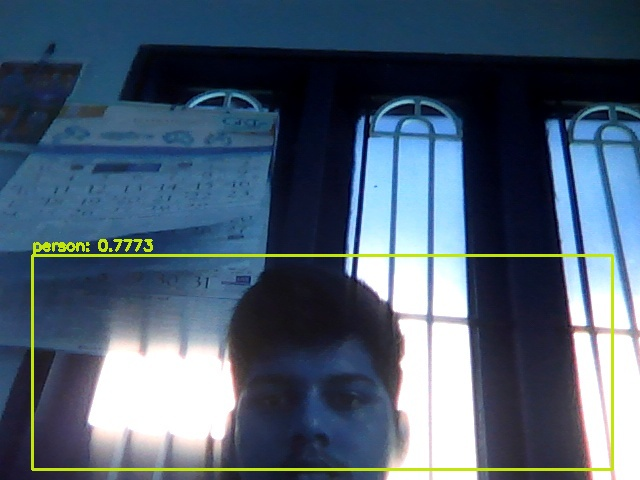

In [7]:
#Image('image.jpg')
cv2.imwrite('C:\\Users\\Hp\\Desktop\\output.jpg', image)
display(Image('C:\\Users\\Hp\\Desktop\\output.jpg'))

In [14]:
language = 'en'
if(len(texts)!=0):
    for ii in range(0,len(texts)):
        if(ii==len(texts)-1):
            mytext="and "+texts[ii]
        else:
            mytext = texts[ii]
            myobj = gTTS(text=mytext, lang=language, slow=False)
            pat="C:\\Users\\Hp\\Desktop\speech\\obj"+str(ii)+".mp3"
            myobj.save(pat)
            os.system(pat)
else:
    mytext="No object detected"
    myobj = gTTS(text=mytext, lang=language, slow=False)
    pat="C:\\Users\\Hp\\Desktop\speech\\objn.mp3"
    myobj.save(pat)
    os.system(pat)

In [11]:
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
from PIL import Image

img = Image.open('C:\\Users\\Hp\\Desktop\\check.jfif')
textt = tess.image_to_string(img)
pathhh ="C:\\Users\\Hp\\Desktop\\check.jfif"
imagee = cv2.imread(pathhh)
#cv2.imshow("test", imagee)
print(textt)


we fall.
we breaks
we fail.

but then,
we rise.

we heal
we overcome.


In [13]:
mytex = textt
language = 'en'
myobj = gTTS(text=mytex, lang=language, slow=False)
pat="C:\\Users\\Hp\\Desktop\speech\\ocr.mp3"
myobj.save(pat)
os.system(pat)
    

0

In [14]:
pwd


'C:\\Users\\Hp\\Desktop\\face_rec'

In [13]:
cd Desktop\face_rec

[WinError 3] The system cannot find the path specified: 'Desktop\\face_rec'
C:\Users\Hp\Desktop\face_rec


In [28]:
run face_rec.py

['donald trump', 'elon musk']


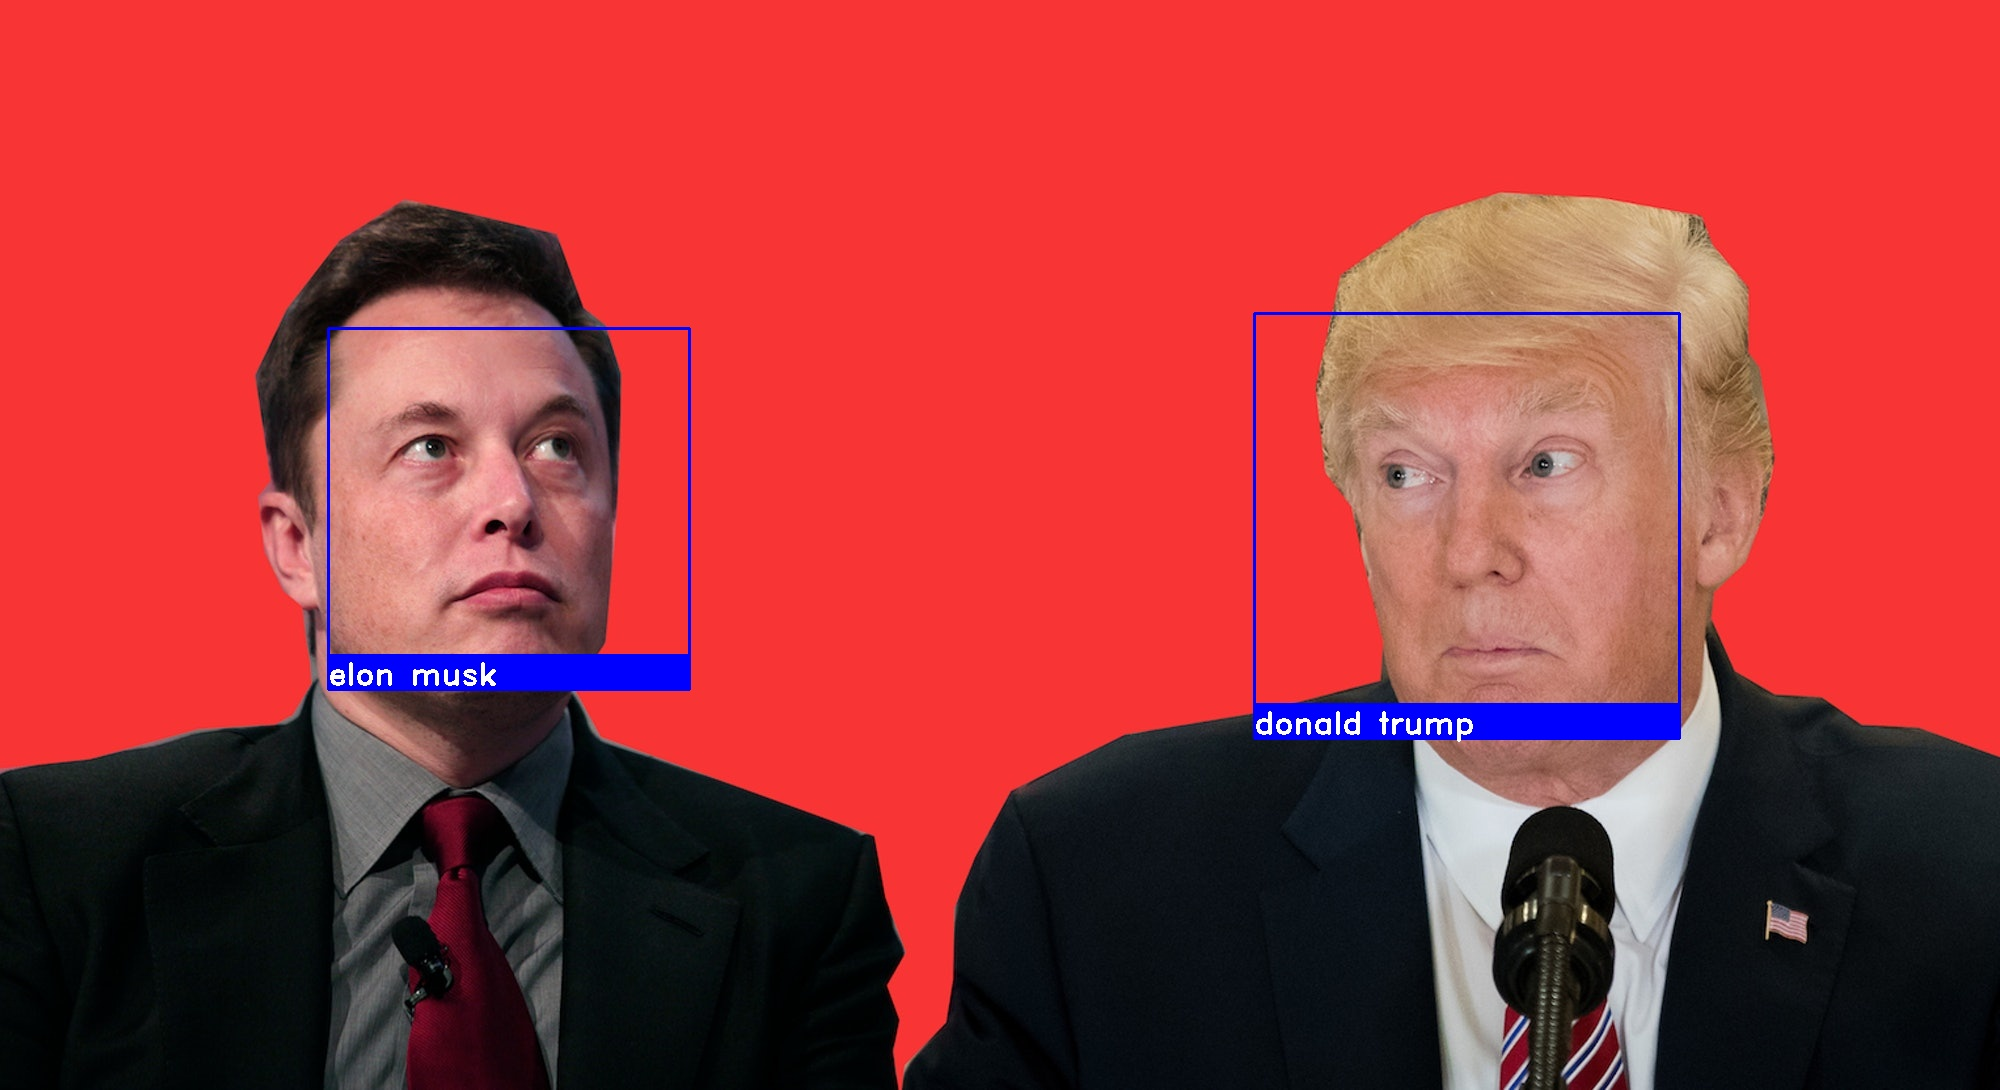

In [29]:
display(Image('C:\\Users\\Hp\\Desktop\\det.jpg'))